# **Not an ideal network**

In [0]:
# Import the necessary packages

# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
# Importing necessary modules from the library 
import numpy as np # np is an alias pointing to numpy library

from keras.models import Sequential #Sequential model is a linear stack of layers.
from keras.layers import Flatten #Flattens the input, Does not affect the batch size.
from keras.layers import Convolution2D 
from keras.utils import np_utils

from keras.datasets import mnist # import Mnist dataset

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data() # split the dataset into testing and training samples

11493376/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)


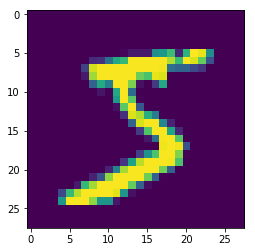

In [0]:
print (X_train.shape)

# Matplotlib is a Python 2D plotting library.  
# Matplotlib.pyplot is a collection of command style functions that make matplotlib work like MATLAB. Each pyplot function makes some change to a figure

from matplotlib import pyplot as plt  
%matplotlib inline
plt.imshow(X_train[0])




In [0]:
#Changing the size of array to include channel information
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255  # making values 0 to 1 ,  ?? 

In [0]:
y_train[:10] 

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices, One Hot Model
Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation, MaxPooling2D

model = Sequential() 
# The model needs to know what input shape it should expect. 
# For this reason, the first layer in a Sequential model (and only the first, because following layers can do automatic shape inference) needs to receive information about its input shape

#input: 28x128 images with 1 channel -> (28,28,1) tensors.
# this applies 32 convolution filters of size 3x3 each with activation function ReLu

model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1))) # input size = 28X28x1, Receptive Field(RF) = 3x3 
model.add(Convolution2D(64, 3, 3, activation='relu'))   # 64 convolution filters of size 3x3, input size = 26x26x32, RF = 5x5
model.add(Convolution2D(128, 3, 3, activation='relu'))  # input ch = 24x24x64, RF = 7x7

model.add(MaxPooling2D(pool_size=(2, 2))) # MaxPooling reduces the size of the image resulting in (11,11,128) , input to MaxPool is (22x22x128)

model.add(Convolution2D(256, 3, 3, activation='relu'))  # input size = 11x11x128 , RF = 9x9
model.add(Convolution2D(512, 3, 3, activation='relu'))  # input size = 9x9x256 ,   RF = 11x11
model.add(Convolution2D(1024, 3, 3, activation='relu')) # input size= 7x7x512 ,    RF = 13x13
model.add(Convolution2D(2048, 3, 3, activation='relu')) # input size = 5x5x1024 ,  RF = 15x15
model.add(Convolution2D(10, 3, 3, activation='relu'))   # input size = 3x3x2048 ,  RF = 17x17
# we add 10 kernels in the last convolution layer as output has 10 classes

model.add(Flatten())  # input size = 3x3x10, , RF = 17x17
 
model.add(Activation('softmax')) # input to Softmax is 10X1  ?? 

model.summary() # print summary

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 9, 9, 256)         295168    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 512)         1180160   
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 5, 5, 1024)        4719616   
__________

## Cross-entropy loss : 
Cross-entropy loss or log loss, measures the performance of a classification model whose output is a probability value between 0 and 1. Cross-entropy loss increases as the predicted probability diverges from the actual label. So predicting a probability of .012 when the actual observation label is 1 would be bad and result in a high loss value. A perfect model would have a log loss of 0.

## ADAM :
Adam is an adaptive learning rate optimization algorithm , which means, it computes individual learning rates for different parameters. Its name is derived from adaptive moment estimation, and the reason it’s called that is because Adam uses estimations of first and second moments of gradient to adapt the learning rate for each weight of the neural network.  The algorithms leverages the power of adaptive learning rates methods to find individual learning rates for each parameter. Adam can be looked at as a combination of RMSprop and Stochastic Gradient Descent with momentum. 


 ## Accuracy
Machine learning model accuracy is the measurement used to determine which model is best at identifying relationships and patterns between variables in a dataset based on the input, or training, data. The better a model can generalize to ‘unseen’ data, the better predictions and insights it produces that deliver more business value. The cost of errors can be huge, but optimizing model accuracy mitigates that cost. Accuracy is one metric for evaluating classification models. Informally, accuracy is the fraction of predictions our model got right. Formally, accuracy has the following definition: 

Accuracy = Number of correct predictions / total number of predictions

In [0]:
#Before training a model, we need to configure the learning process, which is done via the compile method. 
# It receives three arguments: 
# An optimizer,
# A loss function (This is the objective that the model will try to minimize) . It can be the string identifier of an existing loss function (such as categorical_crossentropy or mse), or it can be an objective function. See: losses.
# a list of metrics. For any classification problem you will want to set this to metrics=['accuracy']. A metric could be the string identifier of an existing metric or a custom metric function.

model.compile(loss='categorical_crossentropy', # eqn 
             optimizer='adam',
             metrics=['accuracy'])




In [0]:
# Keras models are trained on Numpy arrays of input data and labels. For training a model, we will typically use the fit function
# Training a network is finding parameters that minimize a loss function (or cost function)

model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1) # Train the model, iterating on the data in batches of 32 samples

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 115s 2ms/step - loss: 1.9204 - acc: 0.2763
Epoch 2/10
60000/60000 [==============================] - 111s 2ms/step - loss: 1.8798 - acc: 0.2884
Epoch 3/10
60000/60000 [==============================] - 112s 2ms/step - loss: 1.8738 - acc: 0.2897
Epoch 4/10
60000/60000 [==============================] - 112s 2ms/step - loss: 1.7384 - acc: 0.3497
Epoch 5/10
60000/60000 [==============================] - 112s 2ms/step - loss: 1.6129 - acc: 0.4027
Epoch 6/10
60000/60000 [==============================] - 112s 2ms/step - loss: 1.4581 - acc: 0.4728
Epoch 7/10
60000/60000 [==============================] - 113s 2ms/step - loss: 1.3890 - acc: 0.5010
Epoch 8/10
60000/60000 [==============================] - 112s 2ms/step - loss: 1.3856 - acc: 0.5016
Epoch 9/10
60000/60000 [==============================] - 112s 2ms/step - loss: 1.3823 - acc: 0.5022
Epoch 10/10
60000/60000 [==============================] - 112s 2ms/step - loss: 1.3818 - a

In [0]:
# Evaluate the model
# Score is the evaluation of the loss function for a given input.
# The cost function here is the categorical_crossentropy.

score = model.evaluate(X_test, Y_test, verbose=0) # Returns the loss value & metrics values for the model in test mode. Computation is done in batches.


In [0]:
print(score)  # [Loss/Cross Entropy Value, Accuracy]

[1.39260767288208, 0.4992]


In [0]:
# Generates output predictions for the input samples. Computation is done in batches.
y_pred = model.predict(X_test) 


In [0]:
print(y_pred[:9])
print(y_test[:9])

[[1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01
  1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01]
 [1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01
  1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01]
 [9.2213559e-06 9.9991703e-01 9.2213559e-06 9.2213559e-06 9.2213559e-06
  9.2213559e-06 9.2213559e-06 9.2213559e-06 9.2213559e-06 9.2213559e-06]
 [1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01
  1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01 1.0000000e-01]
 [1.1783480e-06 1.1783480e-06 1.1783480e-06 1.1783480e-06 9.9998927e-01
  1.1783480e-06 1.1783480e-06 1.1783480e-06 1.1783480e-06 1.1783480e-06]
 [9.2928758e-06 9.9991632e-01 9.2928758e-06 9.2928758e-06 9.2928758e-06
  9.2928758e-06 9.2928758e-06 9.2928758e-06 9.2928758e-06 9.2928758e-06]
 [3.7230548e-04 3.7230548e-04 3.7230548e-04 3.7230548e-04 9.9664921e-01
  3.7230548e-04 3.7230548e-04 3.7230548e-04 3.7230548e-04 

## Things that are wrong with the network : 

* Max Pool added after three layers instead of Five 
> Max Pooling picks up the highest pixel value from the image, and losses information in the process. Although it helps in reducing the number of layers, it is generally a good practise to add it after FIVE layers to make computation better. 

* Global RF is only 17x17 
> The network hasn't been built to see the entire image size (28x28), resulting in not so accurate output. 

* Increasing the number of filters from the second layer upwards till the end of the network isn't necessary. Which is to show that increasing the number of parameters isn't really helping the network. 



